In [11]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 400
import numpy as np

In [2]:
aspm = pd.read_csv('airdata/ASPM2024.CSV')
db1 = pd.read_csv('airdata/DB1BCoupon_2024_3.csv')

In [3]:
t100 = pd.read_csv('airdata/T_T100D_2024.csv')

In [5]:
aspm.columns

Index(['DEP_YYYYMM', 'DEP_DAY', 'DEP_HOUR', 'DEP_QTR', 'ARR_YYYYMM', 'ARR_DAY',
       'ARR_HOUR', 'ARR_QTR', 'OFF_YYYYMM', 'OFF_DAY', 'OFF_HOUR', 'OFF_QTR',
       'ON_YYYYMM', 'ON_DAY', 'ON_HOUR', 'ON_QTR', 'FAACARRIER', 'FLTNO',
       'TAILNO', 'ETMS_EQPT', 'DEP_LOCID', 'ARR_LOCID', 'OOOI', 'ETMS', 'OAG',
       'FLT_TYPE', 'OAG_ACID', 'USER_CLASS', 'OAG_S_DEP', 'T_OAG_S_DE',
       'FILED_PTIM', 'T_FIL_PTIM', 'OOOI_DEP', 'T_OOOI_DEP', 'NOM_TO',
       'TAXI_OUT', 'OAG_OFF', 'T_OAG_OFF', 'PTIM_OFF', 'T_PTIM_OFF',
       'PLAN_OFF', 'T_PLAN_OFF', 'EDCT_OFF', 'T_EDCT_OFF', 'WHEELS_OFF',
       'T_WHLS_OFF', 'ACT_DZ', 'T_ACT_DZ', 'GAP_DZ', 'O_GATE_DEL',
       'GATE_DELAY', 'EDCT_HOLD', 'DELAY_TO', 'OAG_ARPT_DEP', 'PTM_ARPT_DEP',
       'FILED_ETE', 'AIRBORNE', 'ACT_DZ2AZ', 'DELAY_AIR', 'ACT_AZ', 'T_ACT_AZ',
       'GAP_AZ', 'EDCT_ON', 'T_EDCT_ON', 'WHEELS_ON', 'T_WHLS_ON', 'EDCT_ARR',
       'NOM_TI', 'TAXI_IN', 'OAG_S_G2G', 'OOOI_G2G', 'OAG_S_ARR', 'T_OAG_S_AR',
       'ADJ_OAG_ARR'

In [4]:
carr = aspm[(aspm['SELL_CARR']=='AAL') & (aspm['DEP_YYYYMM']==202402) &(aspm['DEP_DAY']==12)]

In [6]:
carr['DEP_LOCID'] = carr['DEP_LOCID'].map(str.strip)
carr['ARR_LOCID'] = carr['ARR_LOCID'].map(str.strip)
carr['ARR_LOCID']=='JFK'

C:\Users\thewo\AppData\Local\Temp/ipykernel_6776/1705196587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carr['DEP_LOCID'] = carr['DEP_LOCID'].map(str.strip)
C:\Users\thewo\AppData\Local\Temp/ipykernel_6776/1705196587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carr['ARR_LOCID'] = carr['ARR_LOCID'].map(str.strip)


14242      False
14619       True
15361       True
16065      False
16413      False
           ...  
8220082    False
8220301    False
8220907    False
8221764    False
8222383    False
Name: ARR_LOCID, Length: 5759, dtype: bool

In [19]:
carr['TAILNO']

14249      N110AN 
14627      N107NN 
14996      N101NN 
15369      N106NN 
15964      N748UW 
            ...   
8222279    N728SK 
8222326    N728SK 
8222391    N716SK 
8231886    N718EV 
8232417    N751SK 
Name: TAILNO, Length: 5626, dtype: object

In [5]:
AAfl = db1[db1['TkCarrier']=='AA']
AAfl.columns

Index(['ItinID', 'MktID', 'SeqNum', 'Coupons', 'Year', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Quarter', 'Origin',
       'OriginCountry', 'OriginStateFips', 'OriginState', 'OriginStateName',
       'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID',
       'Dest', 'DestCountry', 'DestStateFips', 'DestState', 'DestStateName',
       'DestWac', 'Break', 'CouponType', 'TkCarrier', 'OpCarrier', 'RPCarrier',
       'Passengers', 'FareClass', 'Distance', 'DistanceGroup', 'Gateway',
       'ItinGeoType', 'CouponGeoType', 'Unnamed: 36'],
      dtype='object')

In [46]:
AAfl[AAfl['Coupons']==4]

,ItinID,MktID,SeqNum,Coupons,Year,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Quarter,Origin,...,OpCarrier,RPCarrier,Passengers,FareClass,Distance,DistanceGroup,Gateway,ItinGeoType,CouponGeoType,Unnamed: 36
9,20243987867,2024398786703,3,4,2024,14524,1452401,34524,3,RIC,...,AA,AA,1.0,X,1158.0,3,0.0,2,2,NaN
10,20243984105,2024398410503,3,4,2024,13931,1393102,33667,3,ORF,...,OH,AA,1.0,X,290.0,1,0.0,2,2,NaN
11,202431306676,20243130667603,3,4,2024,11066,1106606,31066,3,CMH,...,AA,AA,1.0,X,347.0,1,0.0,2,2,NaN
12,202431305441,20243130544103,3,4,2024,14814,1481403,30476,3,SHV,...,OH,AA,1.0,X,764.0,2,0.0,2,2,NaN
13,202431314452,20243131445203,3,4,2024,15412,1541206,35412,3,TYS,...,OH,AA,1.0,X,177.0,1,0.0,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11748190,202433298277,20243329827701,1,4,2024,10136,1013603,30136,3,ABI,...,MQ,MQ,1.0,X,158.0,1,0.0,2,2,NaN
11748191,202433455348,20243345534801,1,4,2024,15249,1524906,35249,3,TLH,...,MQ,MQ,1.0,X,767.0,2,0.0,2,2,NaN
11748192,202433361043,20243336104301,1,4,2024,11637,1163703,31637,3,FAR,...,MQ,MQ,1.0,X,557.0,2,0.0,2,2,NaN
11748193,202433360553,20243336055301,1,4,2024,11637,1163703,31637,3,FAR,...,MQ,MQ,1.0,X,968.0,2,0.0,2,2,NaN


In [83]:
itin = AAfl[(AAfl['ItinID'] == 20243984105)]# | (AAfl['ItinID'] ==202431306676)]

In [84]:
itin

,ItinID,MktID,SeqNum,Coupons,Year,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Quarter,Origin,...,OpCarrier,RPCarrier,Passengers,FareClass,Distance,DistanceGroup,Gateway,ItinGeoType,CouponGeoType,Unnamed: 36
10,20243984105,2024398410503,3,4,2024,13931,1393102,33667,3,ORF,...,OH,AA,1.0,X,290.0,1,0.0,2,2,NaN
1756819,20243984105,2024398410501,1,4,2024,14057,1405702,34057,3,PDX,...,AA,AA,1.0,X,2282.0,5,0.0,2,2,NaN
6718580,20243984105,2024398410503,4,4,2024,11057,1105703,31057,3,CLT,...,AA,AA,1.0,X,2282.0,5,0.0,2,2,NaN
8084824,20243984105,2024398410501,2,4,2024,11057,1105703,31057,3,CLT,...,AA,AA,1.0,X,290.0,1,0.0,2,2,NaN


In [88]:
leg = itin[itin['SeqNum']==5]

In [71]:
(leg['Break']=='X').iloc[0]

True

In [89]:
leg['Origin'].iloc[0]

IndexError: single positional indexer is out-of-bounds

In [96]:
def processItin(data):
    df = []
    for id in data['ItinID'].unique():
        itin = data[data['ItinID']==id]
        inter = []
        start = None
        for seqnum in range(1, len(itin)+1):
            leg = itin[itin['SeqNum']==seqnum]
            if len(leg) != 0:
                if start is None:
                    start = leg['Origin'].iloc[0]
                else:
                    inter.append(leg['Origin'].iloc[0])
                if (leg['Break'] == 'X').iloc[0]:
                    end = (leg['Dest'].iloc[0])
                    df.append([start, end, inter, leg['Passengers'].iloc[0], len(inter)])
                    start = None
                    inter = []
    return pd.DataFrame(df, columns = ['Origin', 'Dest', 'Stop', 'Passengers', 'Stops'])
                
            


In [101]:
historicalItin = processItin(AAfl)

In [102]:
historicalItin.to_csv('airdata/hist_init.csv')

In [111]:
data = historicalItin[historicalItin['Stops']<=1]

In [114]:
data['Stop'] = data['Stop'].apply(lambda x: x[0] if len(x) == 1 else None)

C:\Users\thewo\AppData\Local\Temp/ipykernel_6776/2572189729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stop'] = data['Stop'].apply(lambda x: x[0] if len(x) == 1 else None)


In [115]:
data.iloc[1]

Origin        RIC
Dest          PDX
Stop          DFW
Passengers    1.0
Stops           1
Name: 1, dtype: object

In [118]:
grouped = data.groupby(['Origin', 'Dest', 'Stop'])['Passengers'].sum().reset_index()

In [119]:
grouped.head()

,Origin,Dest,Stop,Passengers
0,ABE,AGS,CLT,8.0
1,ABE,ATL,CLT,6.0
2,ABE,ATW,CLT,8.0
3,ABE,AUS,CLT,28.0
4,ABE,AVL,CLT,3.0


In [122]:
grouped[(grouped['Origin']=='SFO') & (grouped['Dest']=='BOS')]

,Origin,Dest,Stop,Passengers
51917,SFO,BOS,CLT,66.0
51918,SFO,BOS,DFW,47.0
51919,SFO,BOS,JFK,22.0
51920,SFO,BOS,LAX,24.0
51921,SFO,BOS,MIA,2.0
51922,SFO,BOS,ORD,46.0
51923,SFO,BOS,PHL,38.0
51924,SFO,BOS,PHX,64.0


In [124]:
grouped['Passengers'] = grouped['Passengers'].apply(lambda x: np.floor(x/9))

In [125]:
grouped[(grouped['Origin']=='SFO')]

,Origin,Dest,Stop,Passengers
51856,SFO,ABE,CLT,1.0
51857,SFO,ABI,DFW,2.0
51858,SFO,ABQ,DFW,0.0
51859,SFO,ABQ,LAX,1.0
51860,SFO,ABQ,PHX,18.0
...,...,...,...,...
52373,SFO,VPS,DFW,4.0
52374,SFO,XNA,DFW,24.0
52375,SFO,XNA,ORD,0.0
52376,SFO,XNA,PHX,4.0


In [103]:
historicalItin['Stops'].value_counts()

Stops
1    1028223
0     828500
2      42108
3       1985
4         70
5         12
Name: count, dtype: int64

In [127]:
grouped['Passengers'].sum()

100308.0

In [44]:
AAfl['Coupons'].value_counts()

Coupons
4     1429930
2     1199678
1      165627
3      162569
5       92410
6       41791
7        2956
8        1159
9         197
10         54
11         24
Name: count, dtype: int64

In [49]:
registry = AAfl['Origin'].unique()
flows = np.zeros((registry.shape[0], registry.shape[0]))
for index, row in AAfl.iterrows():
    i = np.where(registry == row['Origin'])[0]
    j = np.where(registry==row['Dest'])[0]
    flows[i,j] += row['Passengers']

In [17]:
len(carr[carr['ETMS_EQPT']=='    '])

64

In [ ]:
def fillFlights(demand, itin, aspm):
    fill = []
    for index, row in aspm.iterrows():
        fill.append([index, getCap(row['ETMS_EQPT']), 0])
    fill = pd.DataFrame(fill, columns=['Flight', 'Cap', 'Pass'])

    
    while demand[demand['Stops']>=1]['Passengers'].sum() >1:
        for _, row in demand[(demand['Passenger']>0)&(demand['Stops']>=1)]:
            dest, orig, stop = row['Origin'], row['Dest'], row['Stop']
            avail = itin[(itin['Origin']==orig)&(itin['Dest']==dest)&(itin['Stop']==stop)&~(itin['Full'])].sort_values(by='Transfer')
            if len(avail) > 0:
                avail.iloc[0]



In [18]:
len(carr)

5759

In [23]:
AAcap = {'A321': 190,'A320':150,'A21N':196,'B738':172,'B77W':304,'B788':234,'B789':285,'B772':273,'A319':128, 'B38M':172,
          '    ':125, 'CRJ2':50, 'E170':65, 'CRJ9':77, 'CRJ7':65, 'E145':50,
       'E75S':76, 'E75L':76}

In [14]:
carr['ETMS_EQPT'].unique()

array(['A321', 'A320', 'A21N', 'B738', 'B77W', 'B788', 'B789', 'B772',
       'A319', 'B38M', '    ', 'CRJ2', 'E170', 'CRJ9', 'CRJ7', 'E145',
       'E75S', 'E75L'], dtype=object)

In [14]:
val = np.argmax(flows)
row = val//flows.shape[0]
col = val%flows.shape[0]
print(row, col)
print(registry[row], registry[col])

87 83
DFW LAX


In [128]:
def getCap(flType):
    return AAcap[flType]

def generateItin2(data):
    columns = ['ItinID', 'Origin','Dest','Stop', 'Capacity','Passengers', 'Full', 'Flights', 'Transfer']
    df = []
    id = 0
    for index, row in data.iterrows():
        cap = getCap(row['ETMS_EQPT'])
        ls = [id, row['DEP_LOCID'], row['ARR_LOCID'], None, cap,0,False, [index], 0]
        df.append(ls)
        connect = data[(data['DEP_LOCID']==row['ARR_LOCID']) & ~(data['ARR_LOCID']==row['DEP_LOCID']) & (data['OAG_S_DEP'] > 45*60 + row['OAG_S_ARR'])&(data['OAG_S_DEP'] < 6*60*60 + row['OAG_S_ARR'])]
        id += 1
        for index2, row2 in connect.iterrows():
            cap2 = getCap(row2['ETMS_EQPT'])
            time = row2['OAG_S_DEP']-row['OAG_S_ARR']
            ls = [id, row['DEP_LOCID'], row2['ARR_LOCID'], row['ARR_LOCID'], min(cap,cap2), 0, False, [index, index2], time]
            df.append(ls)
            id += 1
    return pd.DataFrame(df, columns=columns)

In [31]:
columns = ['ItinID', 'Origin','Dest','Stop', 'Capacity','Passengers', 'Full', 'Flights']
df = pd.DataFrame(columns=columns)
ls = [1, 'JFK', 'ORD', None, 200,0,False, [1]]
df.loc[len(df)] = ls

In [32]:
df

,ItinID,Origin,Dest,Stop,Capacity,Passengers,Full,Flights
0,1,JFK,ORD,None,200,0,False,[1]


In [129]:
itin = generateItin2(carr)

In [32]:
itin.head()

,ItinID,Origin,Dest,Stop,Capacity,Passengers,Full,Flights
0,0,JFK,LAX,None,190,0,False,[14242]
1,1,JFK,KOA,LAX,190,0,False,"[14242, 28246]"
2,2,JFK,HNL,LAX,190,0,False,"[14242, 51479]"
3,3,JFK,LIH,LAX,190,0,False,"[14242, 79130]"
4,4,JFK,PHL,LAX,190,0,False,"[14242, 164355]"


In [38]:
len(itin)

375940

In [35]:
itin.to_csv('airdata/itin_data.csv')

In [22]:
flows[87,14]

11907.0

In [126]:
itin.head()

,ItinID,MktID,SeqNum,Coupons,Year,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Quarter,Origin,...,OpCarrier,RPCarrier,Passengers,FareClass,Distance,DistanceGroup,Gateway,ItinGeoType,CouponGeoType,Unnamed: 36
10,20243984105,2024398410503,3,4,2024,13931,1393102,33667,3,ORF,...,OH,AA,1.0,X,290.0,1,0.0,2,2,NaN
1756819,20243984105,2024398410501,1,4,2024,14057,1405702,34057,3,PDX,...,AA,AA,1.0,X,2282.0,5,0.0,2,2,NaN
6718580,20243984105,2024398410503,4,4,2024,11057,1105703,31057,3,CLT,...,AA,AA,1.0,X,2282.0,5,0.0,2,2,NaN
8084824,20243984105,2024398410501,2,4,2024,11057,1105703,31057,3,CLT,...,AA,AA,1.0,X,290.0,1,0.0,2,2,NaN


In [39]:
itin.loc[itin['Flights'].map(lambda x: 14242 in x),'Full']=True

In [41]:
def lockFlight(data, flightNo):
    data.loc[data['Flights'].map(lambda x: flightNo in x), 'Full'] = True

In [38]:
itin['Flights'].map(lambda x: 14242 in x)

0          True
1          True
2          True
3          True
4          True
          ...  
379884    False
379885    False
379886    False
379887    False
379888    False
Name: Flights, Length: 379889, dtype: bool

In [40]:
itin[itin['Flights'].map(lambda x: 14242 in x)]

,ItinID,Origin,Dest,Stop,Capacity,Passengers,Full,Flights
0,0,JFK,LAX,None,190,0,True,[14242]
1,1,JFK,KOA,LAX,190,0,True,"[14242, 28246]"
2,2,JFK,HNL,LAX,190,0,True,"[14242, 51479]"
3,3,JFK,LIH,LAX,190,0,True,"[14242, 79130]"
4,4,JFK,PHL,LAX,190,0,True,"[14242, 164355]"
5,5,JFK,AUS,LAX,172,0,True,"[14242, 173670]"
6,6,JFK,ORD,LAX,172,0,True,"[14242, 201400]"
7,7,JFK,DFW,LAX,190,0,True,"[14242, 355263]"
8,8,JFK,CLT,LAX,190,0,True,"[14242, 430484]"
9,9,JFK,MIA,LAX,190,0,True,"[14242, 542267]"


In [23]:
registry[23]

'PHX'

In [21]:
np.where(registry=='SEA')

(array([14], dtype=int64),)

IndexError: index 20615 is out of bounds for axis 0 with size 236

In [44]:
t100 = t100[t100['UNIQUE_CARRIER']=='AA']

In [45]:
t100[t100['MONTH']==8]

,PASSENGERS,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,YEAR,MONTH
14852,0.0,AA,19805,American Airlines Inc.,AA,10994,CHS,15304,TPA,2024,8
43825,1.0,AA,19805,American Airlines Inc.,AA,10529,BDL,15016,STL,2024,8
43827,1.0,AA,19805,American Airlines Inc.,AA,10721,BOS,12478,JFK,2024,8
43830,1.0,AA,19805,American Airlines Inc.,AA,10821,BWI,12478,JFK,2024,8
43835,1.0,AA,19805,American Airlines Inc.,AA,11042,CLE,12478,JFK,2024,8
...,...,...,...,...,...,...,...,...,...,...,...
246775,56772.0,AA,19805,American Airlines Inc.,AA,13930,ORD,11298,DFW,2024,8
246868,59398.0,AA,19805,American Airlines Inc.,AA,11298,DFW,13303,MIA,2024,8
246945,62772.0,AA,19805,American Airlines Inc.,AA,13303,MIA,11298,DFW,2024,8
247037,72359.0,AA,19805,American Airlines Inc.,AA,12892,LAX,11298,DFW,2024,8


In [18]:
carr['FAACARRIER'].unique()

array(['AAL', 'AWI', 'ENY', 'JIA', 'PDT', 'RPA', 'SKW'], dtype=object)

In [46]:
t100.columns

Index(['PASSENGERS', 'UNIQUE_CARRIER', 'AIRLINE_ID', 'UNIQUE_CARRIER_NAME',
       'CARRIER', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID', 'DEST',
       'YEAR', 'MONTH'],
      dtype='object')

In [11]:
AAfl.columns

Index(['ItinID', 'MktID', 'SeqNum', 'Coupons', 'Year', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Quarter', 'Origin',
       'OriginCountry', 'OriginStateFips', 'OriginState', 'OriginStateName',
       'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID',
       'Dest', 'DestCountry', 'DestStateFips', 'DestState', 'DestStateName',
       'DestWac', 'Break', 'CouponType', 'TkCarrier', 'OpCarrier', 'RPCarrier',
       'Passengers', 'FareClass', 'Distance', 'DistanceGroup', 'Gateway',
       'ItinGeoType', 'CouponGeoType', 'Unnamed: 36'],
      dtype='object')

In [18]:
carr['DEP_YYYYMM']

14205      202408
14206      202401
14207      202401
14208      202401
14209      202401
            ...  
8233012    202408
8233013    202402
8233014    202405
8233015    202405
8233016    202406
Name: DEP_YYYYMM, Length: 2182342, dtype: int64

In [ ]:
carr = [carr['']]

[' JX',
 ' OG',
 ' ZG',
 'AAB',
 'AAE',
 'AAH',
 'AAL',
 'NKS',
 'FFT',
 'AAR',
 'AAY',
 'ABB',
 'ABD',
 'ABF',
 'ABK',
 'ABL',
 'ABP',
 'ABX',
 'ACA',
 'ACL',
 'ACW',
 'ADB',
 'ADN',
 'ADS',
 'ADZ',
 'AEA',
 'AEF',
 'AEN',
 'AER',
 'AEW',
 'AFP',
 'AFR',
 'JBU',
 'AHF',
 'AHY',
 'AIB',
 'AIC',
 'AIE',
 'AIP',
 'AIR',
 'AJI',
 'AJO',
 'AJT',
 'AKK',
 'AKN',
 'AKT',
 'ALE',
 'ALL',
 'ALN',
 'AME',
 'AMF',
 'AMX',
 'ANA',
 'ANG',
 'ANT',
 'ANX',
 'ANZ',
 'AOJ',
 'APC',
 'APK',
 'APN',
 'APW',
 'APZ',
 'ARE',
 'LAN',
 'ARF',
 'ARG',
 'ARL',
 'ARN',
 'ARR',
 'ARU',
 'ARZ',
 'ASA',
 'ASH',
 'UAL',
 'ASI',
 'ASL',
 'ASP',
 'ASY',
 'ASZ',
 'ATC',
 'ATK',
 'ATM',
 'ATN',
 'AUA',
 'AUD',
 'AUH',
 'AUU',
 'AVA',
 'AVL',
 'AVN',
 'AWC',
 'AWI',
 'AWW',
 'AXA',
 'AXL',
 'AXQ',
 'AXY',
 'AYJ',
 'AZG',
 'AZQ',
 'AZU',
 'AZY',
 'BAF',
 'BAH',
 'BAT',
 'BAW',
 'BBA',
 'BBB',
 'BBD',
 'BBQ',
 'BBT',
 'BCP',
 'BCS',
 'BDF',
 'BEC',
 'BEL',
 'BEZ',
 'BFF',
 'BFL',
 'BFY',
 'BGE',
 'BGR',
 'BHR',
 'BHS',


In [7]:
aspm.head()

,DEP_YYYYMM,DEP_DAY,DEP_HOUR,DEP_QTR,ARR_YYYYMM,ARR_DAY,ARR_HOUR,ARR_QTR,OFF_YYYYMM,OFF_DAY,...,T_OAG_S_AR,ADJ_OAG_ARR,T_ADJ_OAG_ARR,OOOI_ARR,T_OOOI_ARR,DELAY_TI,DIF_G2G,O_ARR_DEL,DELAY_ARR,SELL_CARR
0,202403,1,23,2,202403,3,6,1,202403,1,...,06:07,1393884468,06:07,1393883820,05:57,0.0,0,0,0,JX
1,202401,3,0,1,202401,4,6,1,202401,3,...,06:07,1388786850,06:07,1388786220,05:57,0.0,0,0,0,JX
2,202401,4,23,3,202401,6,6,2,202401,5,...,06:23,1388960610,06:23,1388959920,06:12,0.0,0,0,0,JX
3,202401,6,23,3,202401,8,5,3,202401,7,...,05:40,1389130830,05:40,1389130200,05:30,0.0,0,0,0,JX
4,202401,9,23,3,202401,11,5,3,202401,10,...,05:39,1389389970,05:39,1389389340,05:29,0.0,0,0,0,JX


In [14]:
data = pd.read_csv('data/ASPM_2019.csv')

In [27]:
def process(dayData):
    dayData['qtr_dep'] = (dayData['OOOI_DEP']//900)
    dayData['qtr_arr'] = (dayData['WHEELS_ON']//900)
    dayData['plan_dep'] = (dayData['OAG_S_DEP']//900)
    minVal = dayData['qtr_dep'].min()
    dayData['qtr_dep'] -= minVal
    dayData['qtr_arr'] -= minVal
    dayData['plan_dep'] -= minVal

def plot(df):
    deps = df.groupby(['qtr_dep']).size().reset_index(name='count')
    arrs = df.groupby(['qtr_arr']).size().reset_index(name='count')
    dep_cum = np.cumsum(deps['count'])
    arr_cum = np.cumsum(arrs['count'])
    plt.plot(deps['qtr_dep'], dep_cum)
    plt.plot(arrs['qtr_arr'], arr_cum)
    plt.legend(['Departures', 'Arrivals'])

def plot_comp(df):
    p_deps = df.groupby(['plan_dep']).size().reset_index(name='count')
    plot(df)
    plan_cum = np.cumsum(p_deps['count'])
    plt.plot(p_deps['plan_dep'], plan_cum)
    plt.legend(['Act. Dep.', 'Act. Arr.','Planned Dep.'])

In [ ]:
data.columns

Index(['DEP_YYYYMM', 'DEP_DAY', 'DEP_HOUR', 'DEP_QTR', 'ARR_YYYYMM', 'ARR_DAY',
       'ARR_HOUR', 'ARR_QTR', 'OFF_YYYYMM', 'OFF_DAY', 'OFF_HOUR', 'OFF_QTR',
       'ON_YYYYMM', 'ON_DAY', 'ON_HOUR', 'ON_QTR', 'FAACARRIER', 'FLTNO',
       'TAILNO', 'ETMS_EQPT', 'DEP_LOCID', 'ARR_LOCID', 'OOOI', 'ETMS', 'OAG',
       'FLT_TYPE', 'OAG_ACID', 'USER_CLASS', 'OAG_S_DEP', 'T_OAG_S_DE',
       'FILED_PTIM', 'T_FIL_PTIM', 'OOOI_DEP', 'T_OOOI_DEP', 'NOM_TO',
       'TAXI_OUT', 'OAG_OFF', 'T_OAG_OFF', 'PTIM_OFF', 'T_PTIM_OFF',
       'PLAN_OFF', 'T_PLAN_OFF', 'EDCT_OFF', 'T_EDCT_OFF', 'WHEELS_OFF',
       'T_WHLS_OFF', 'ACT_DZ', 'T_ACT_DZ', 'GAP_DZ', 'O_GATE_DEL',
       'GATE_DELAY', 'EDCT_HOLD', 'DELAY_TO', 'OAG_ARPT_DEP', 'PTM_ARPT_DEP',
       'FILED_ETE', 'AIRBORNE', 'ACT_DZ2AZ', 'DELAY_AIR', 'ACT_AZ', 'T_ACT_AZ',
       'GAP_AZ', 'EDCT_ON', 'T_EDCT_ON', 'WHEELS_ON', 'T_WHLS_ON', 'EDCT_ARR',
       'NOM_TI', 'TAXI_IN', 'OAG_S_G2G', 'OOOI_G2G', 'OAG_S_ARR', 'T_OAG_S_AR',
       'ADJ_OAG_ARR'

In [ ]:
data['DEP_LOCID'][0]

' EWR'

In [ ]:
data['DEP_YYYYMM'][0]

202207

In [35]:
month = 8
start = 24
end = 24
dayData = data[data['OFF_YYYYMM']==201900+month]
dayData = dayData[(dayData['OFF_DAY'] >= start) &(dayData['OFF_DAY'] <= end)]
process(dayData)


In [ ]:
len(dayData)

61331

Text(0.5, 1.0, 'Cumulative Flights for Aug. 24, 2019 (Undisturbed day)')

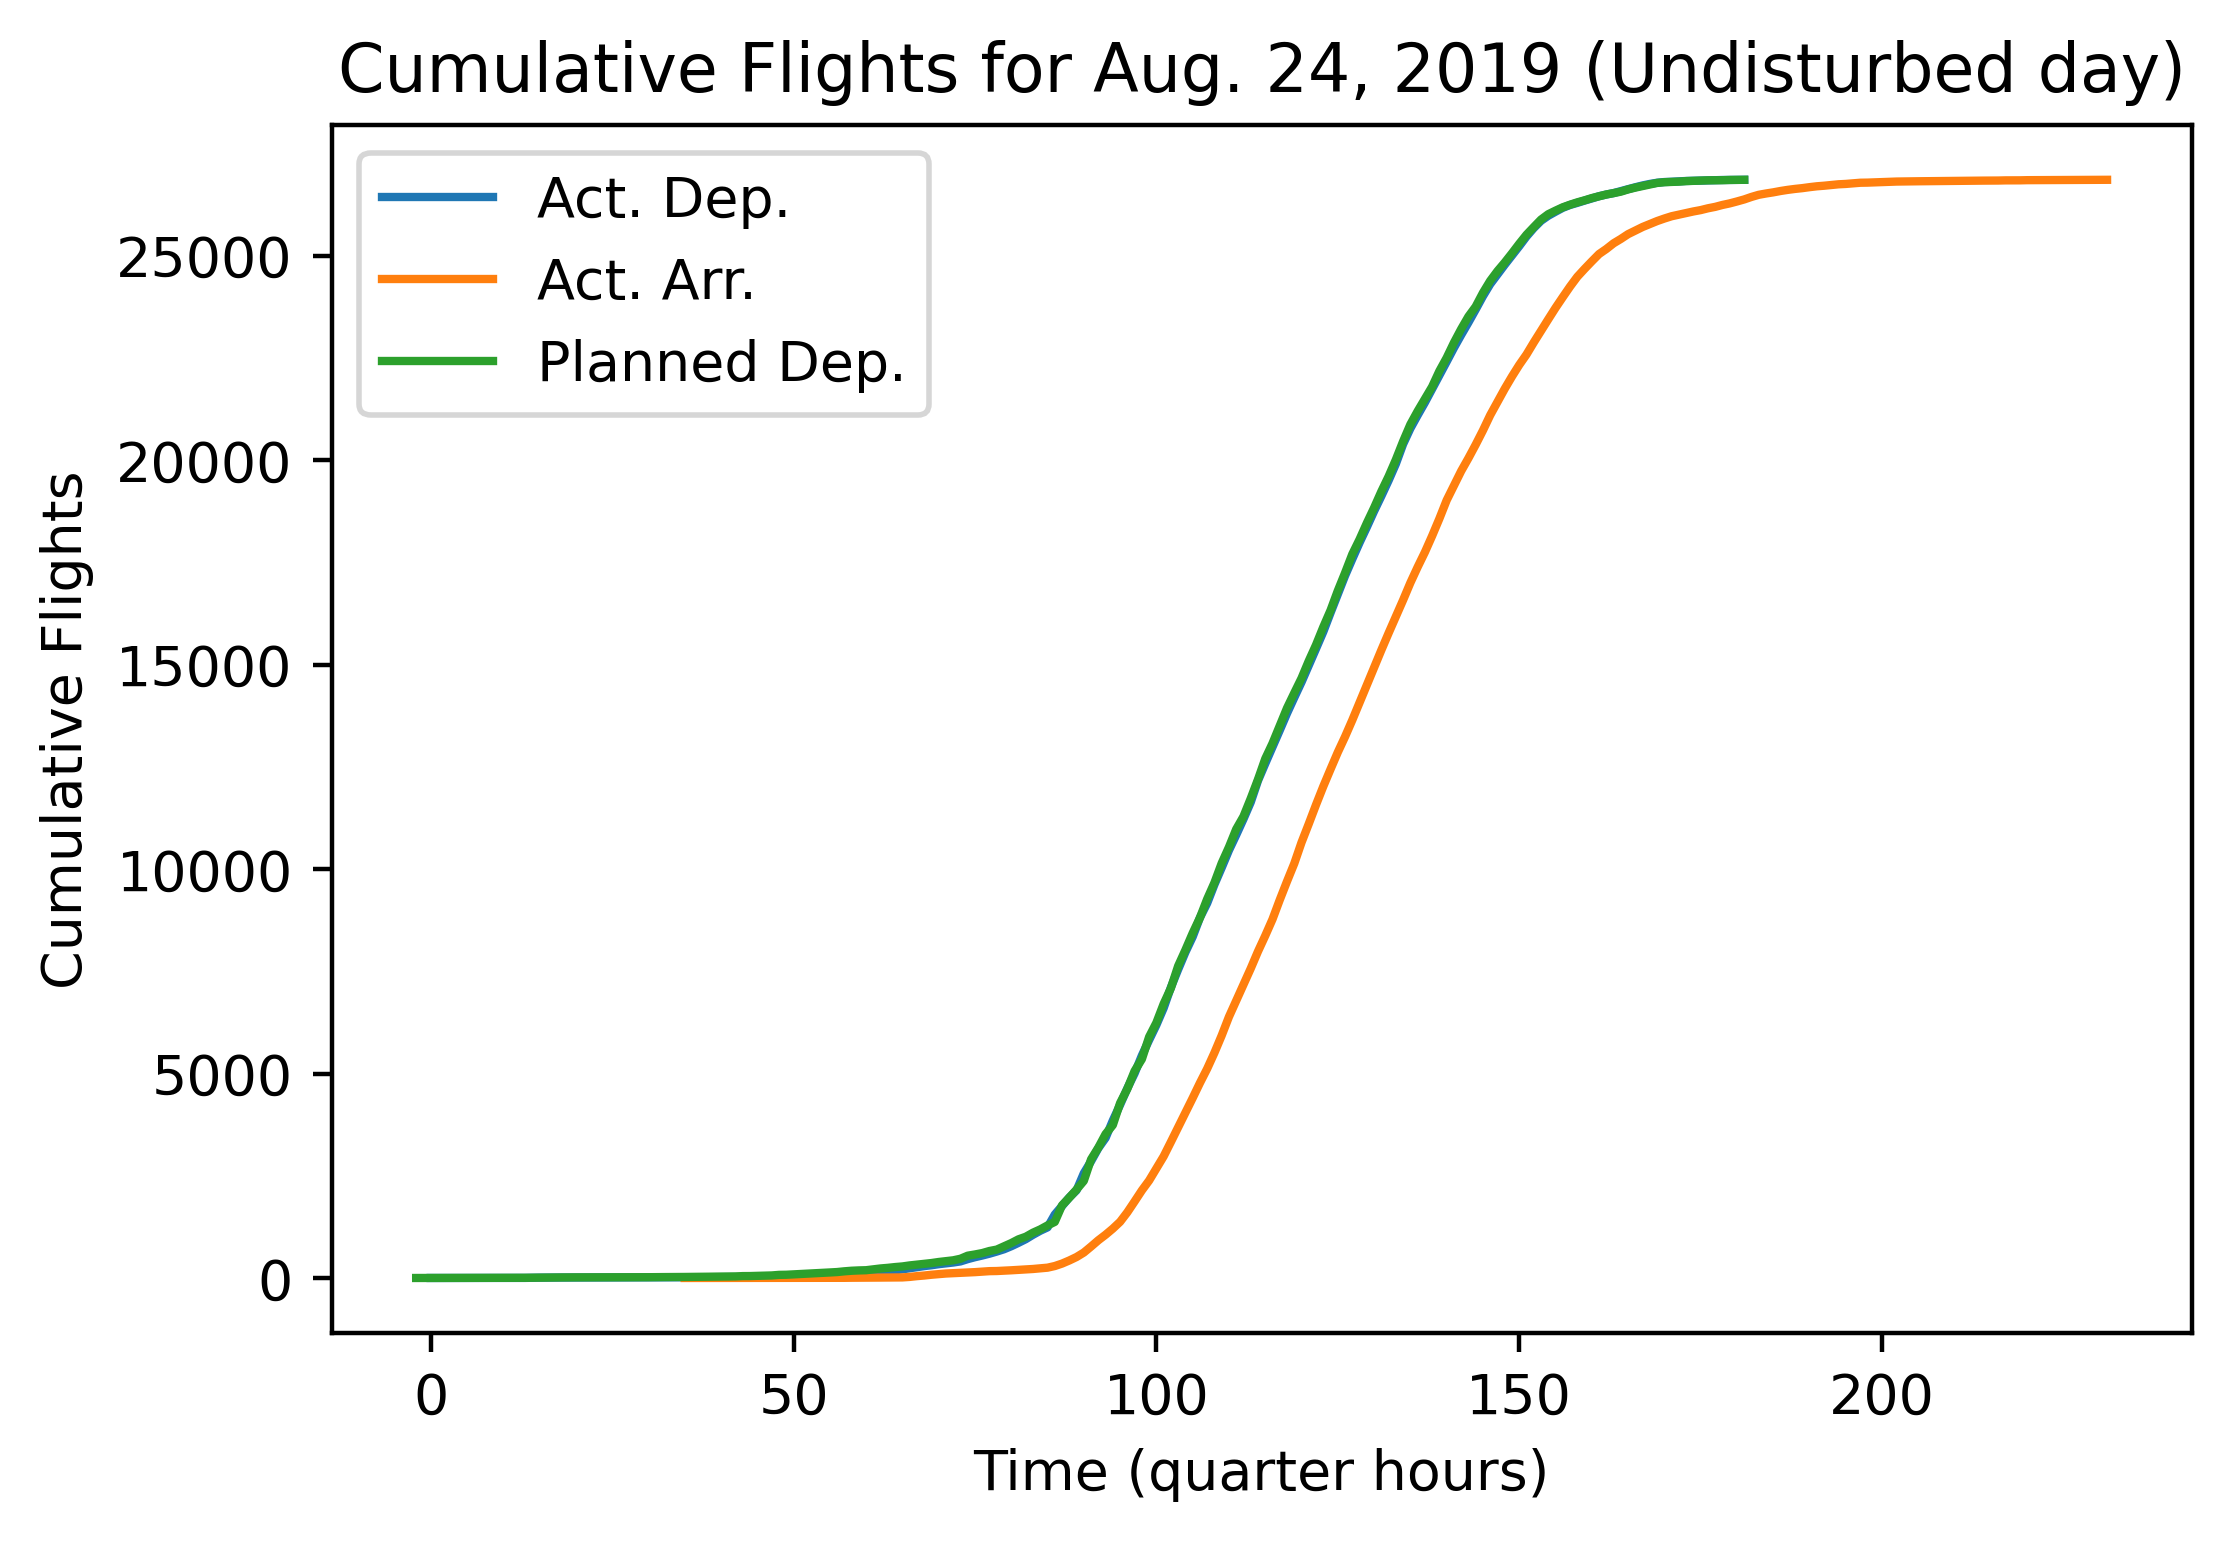

In [36]:
plot_comp(dayData)
plt.xlabel('Time (quarter hours)')
plt.ylabel('Cumulative Flights')
plt.title('Cumulative Flights for Aug. 24, 2019 (Undisturbed day)')

Text(0.5, 1.0, 'Cumulative Flights for Feb. 20, 2019')

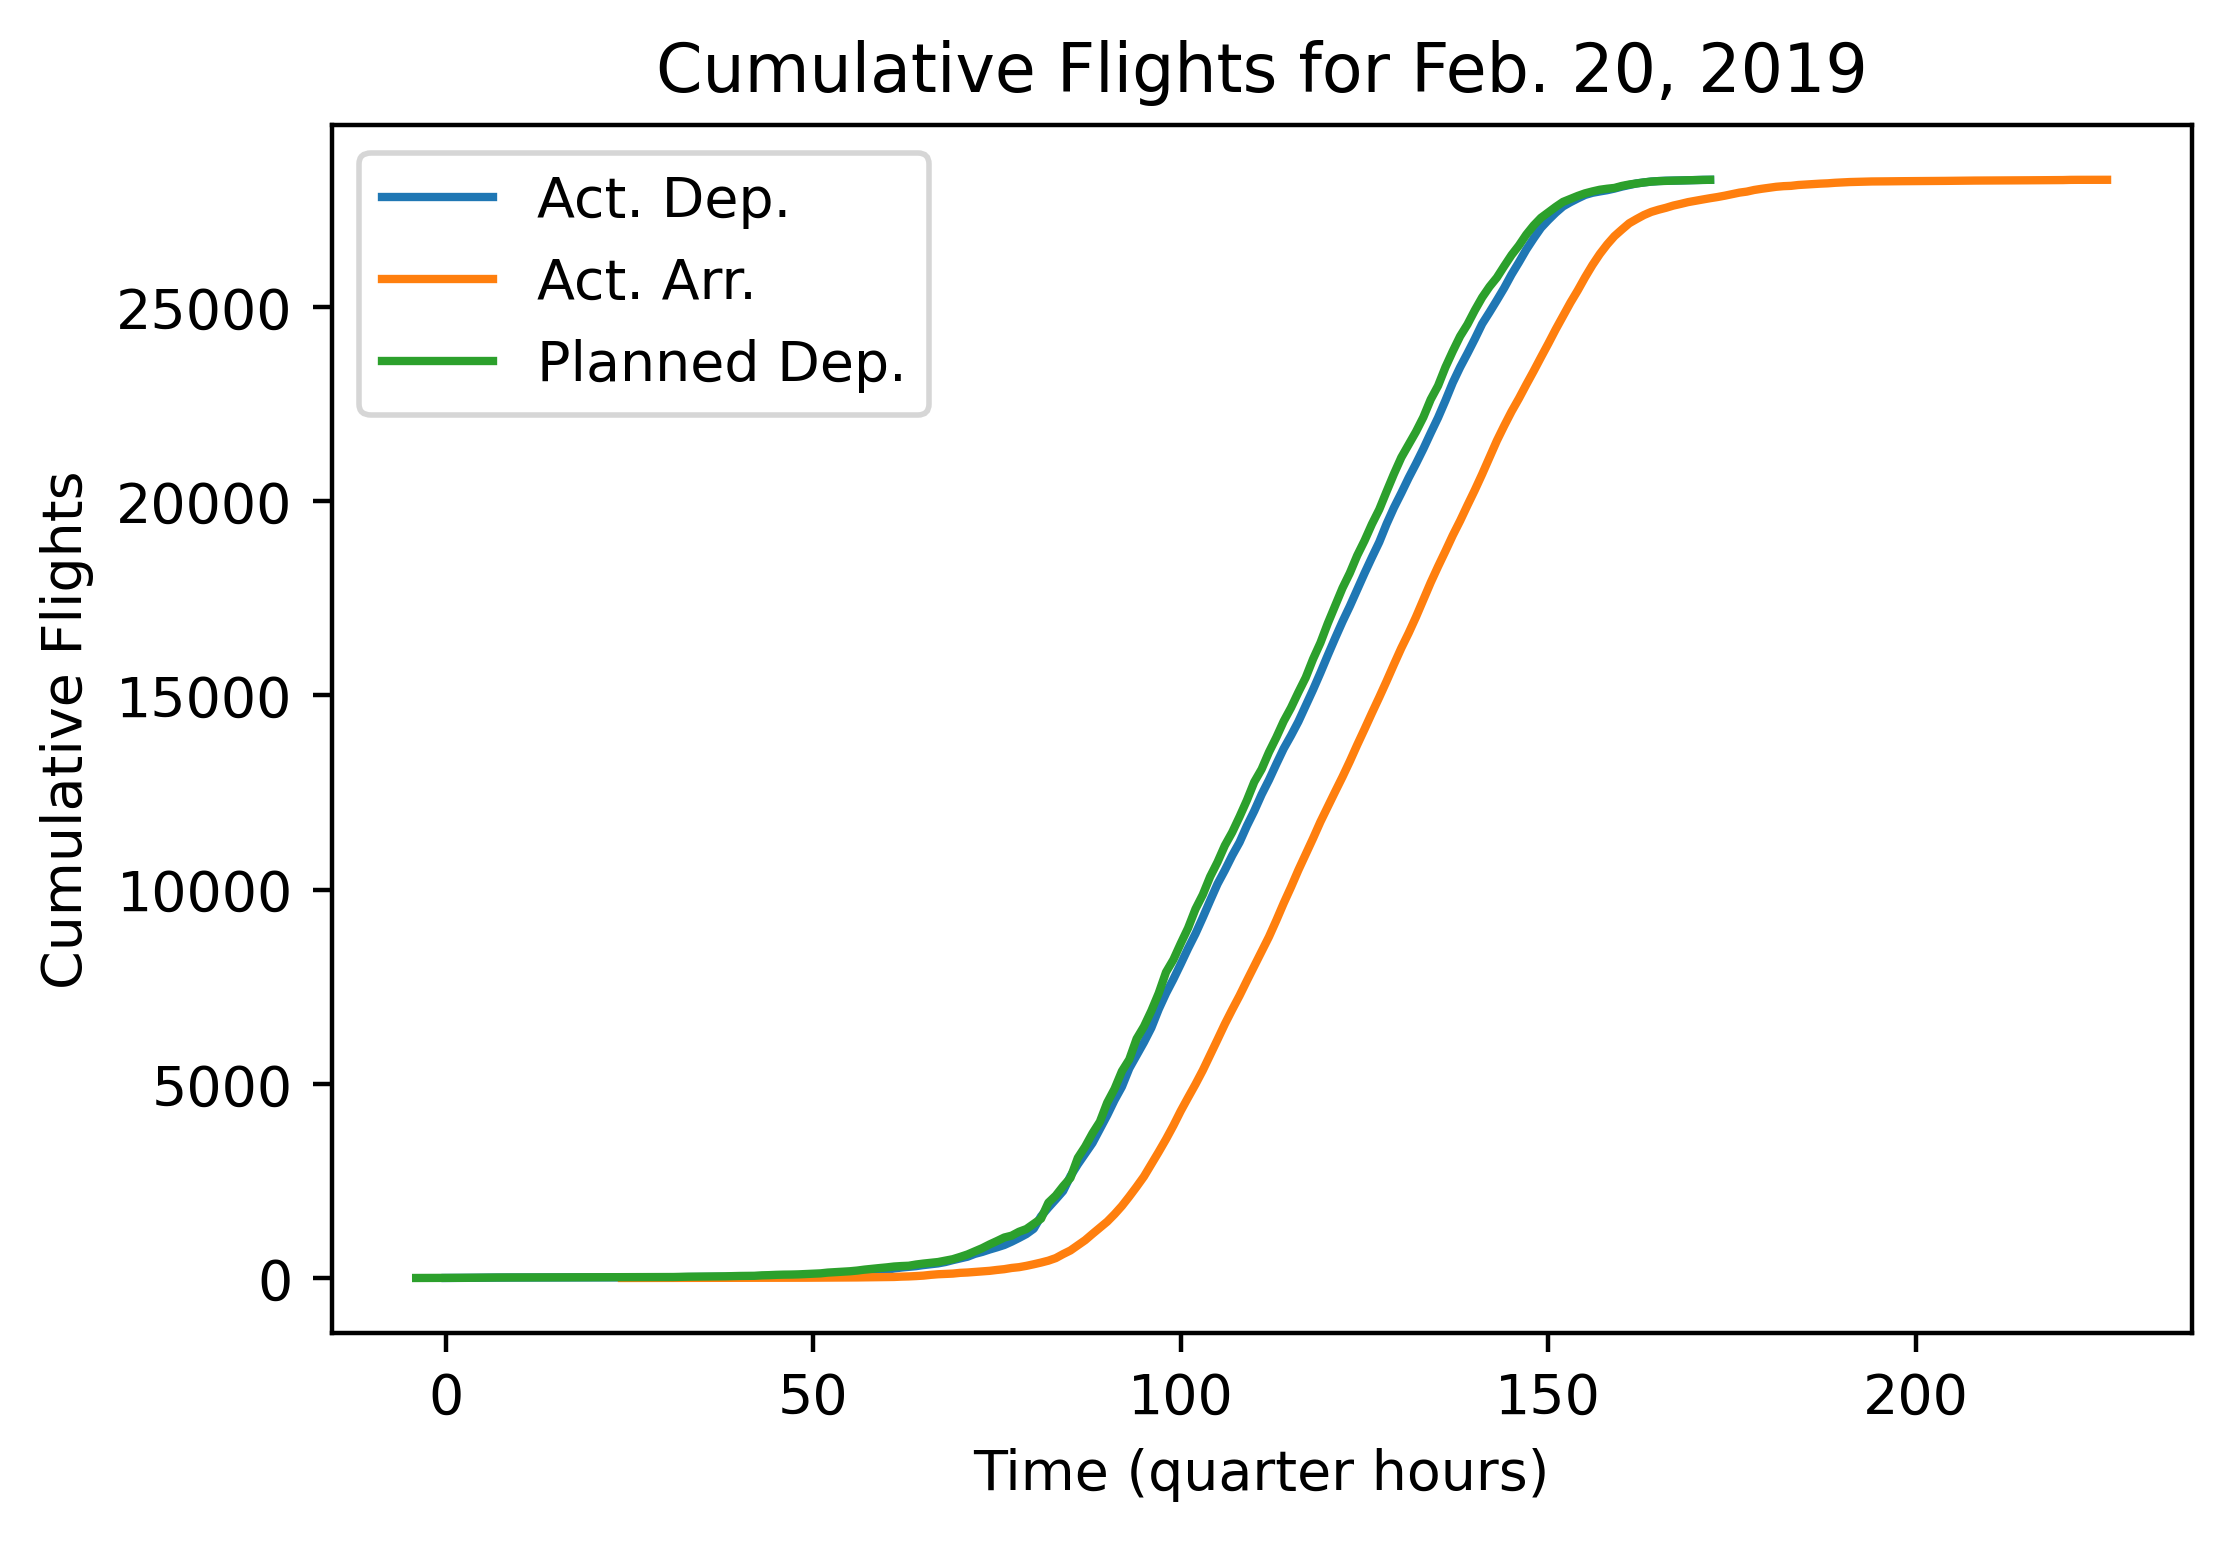

In [32]:

month = 2
start = 20
end = 20
dayData = data[data['OFF_YYYYMM']==201900+month]
dayData = dayData[(dayData['OFF_DAY'] >= start) &(dayData['OFF_DAY'] <= end)]
process(dayData)
plot_comp(dayData)
plt.xlabel('Time (quarter hours)')
plt.ylabel('Cumulative Flights')
plt.title('Cumulative Flights for Feb. 20, 2019')

In [ ]:
process(dayData)

In [ ]:
deps = dayData.groupby(['qtr_dep']).size().reset_index(name='count')
arrs = dayData.groupby(['qtr_arr']).size().reset_index(name='count')



In [ ]:
def addTime(df):
    minDay =  df['day'].min()
    df['time'] = (df['day']-minDay)*24*4+df['hour']*4+df['qtr']

In [ ]:
deps = dayData.groupby(['OFF_DAY', 'OFF_HOUR', 'OFF_QTR']).size().reset_index(name='count')
deps.columns = ['day','hour', 'qtr','count']
addTime(deps)
dep_ls = list(deps['count'])
dep_time = list(deps['time'])


In [ ]:
deps.head()

,day,hour,qtr,count,time
0,1,0,1,32,1
1,1,0,2,16,2
2,1,0,3,28,3
3,1,0,4,43,4
4,1,1,1,32,5


In [ ]:
arrs = dayData.groupby(['ARR_DAY','ARR_HOUR','ARR_QTR']).size().reset_index(name='count')
arrs.columns = ['day','hour', 'qtr','count']
addTime(arrs)
arr_ls = list(arrs['count'])
arr_time = list(arrs['time'])

In [ ]:
dayData[(dayData['ARR_DAY']==1) & (dayData['ARR_HOUR']==0) & (dayData['ARR_QTR']==2)][['DEP_LOCID','ARR_LOCID']]

,DEP_LOCID,ARR_LOCID
3954493,ATL,MEM


In [ ]:
arrs

,day,hour,qtr,count,time
0,1,0,2,1,2
1,1,0,3,2,3
2,1,0,4,3,4
3,1,1,1,2,5
4,1,1,2,3,6
...,...,...,...,...,...
297,28,20,3,1,2675
298,28,21,1,1,2677
299,28,22,1,1,2681
300,28,23,1,1,2685


In [ ]:
dep_cum = np.cumsum(deps['count'])
arr_cum = np.cumsum(arrs['count'])

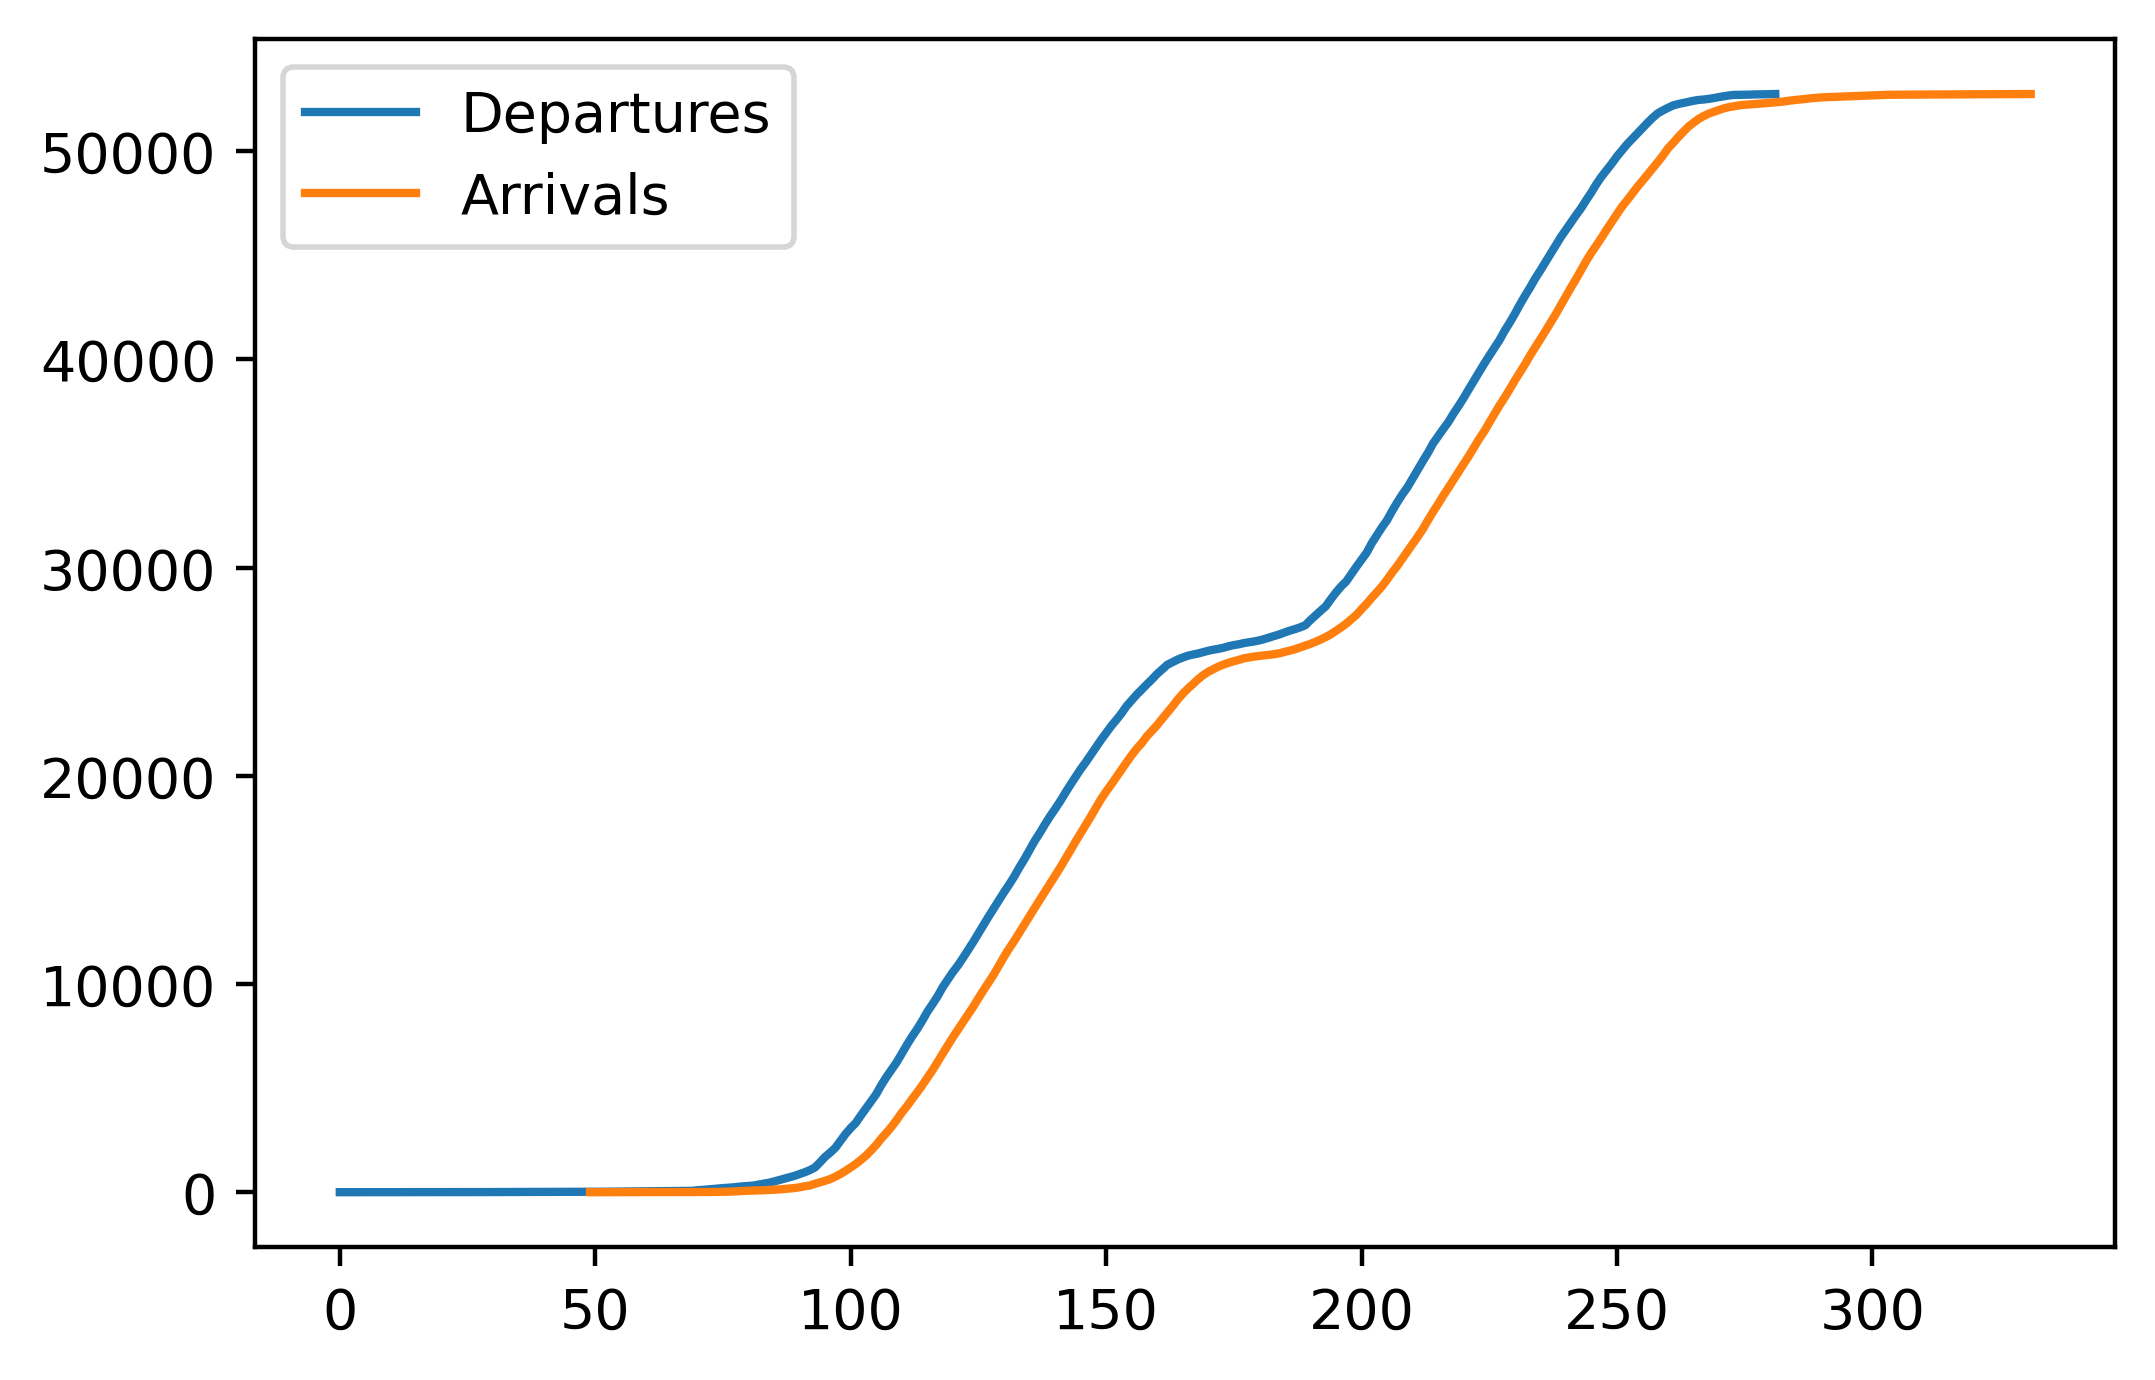

In [ ]:
plt.plot(deps['qtr_dep'], dep_cum)
plt.plot(arrs['qtr_arr'], arr_cum)
plt.legend(['Departures', 'Arrivals'])

In [2]:
x = np.arange(16)*15

In [5]:
y = x*175

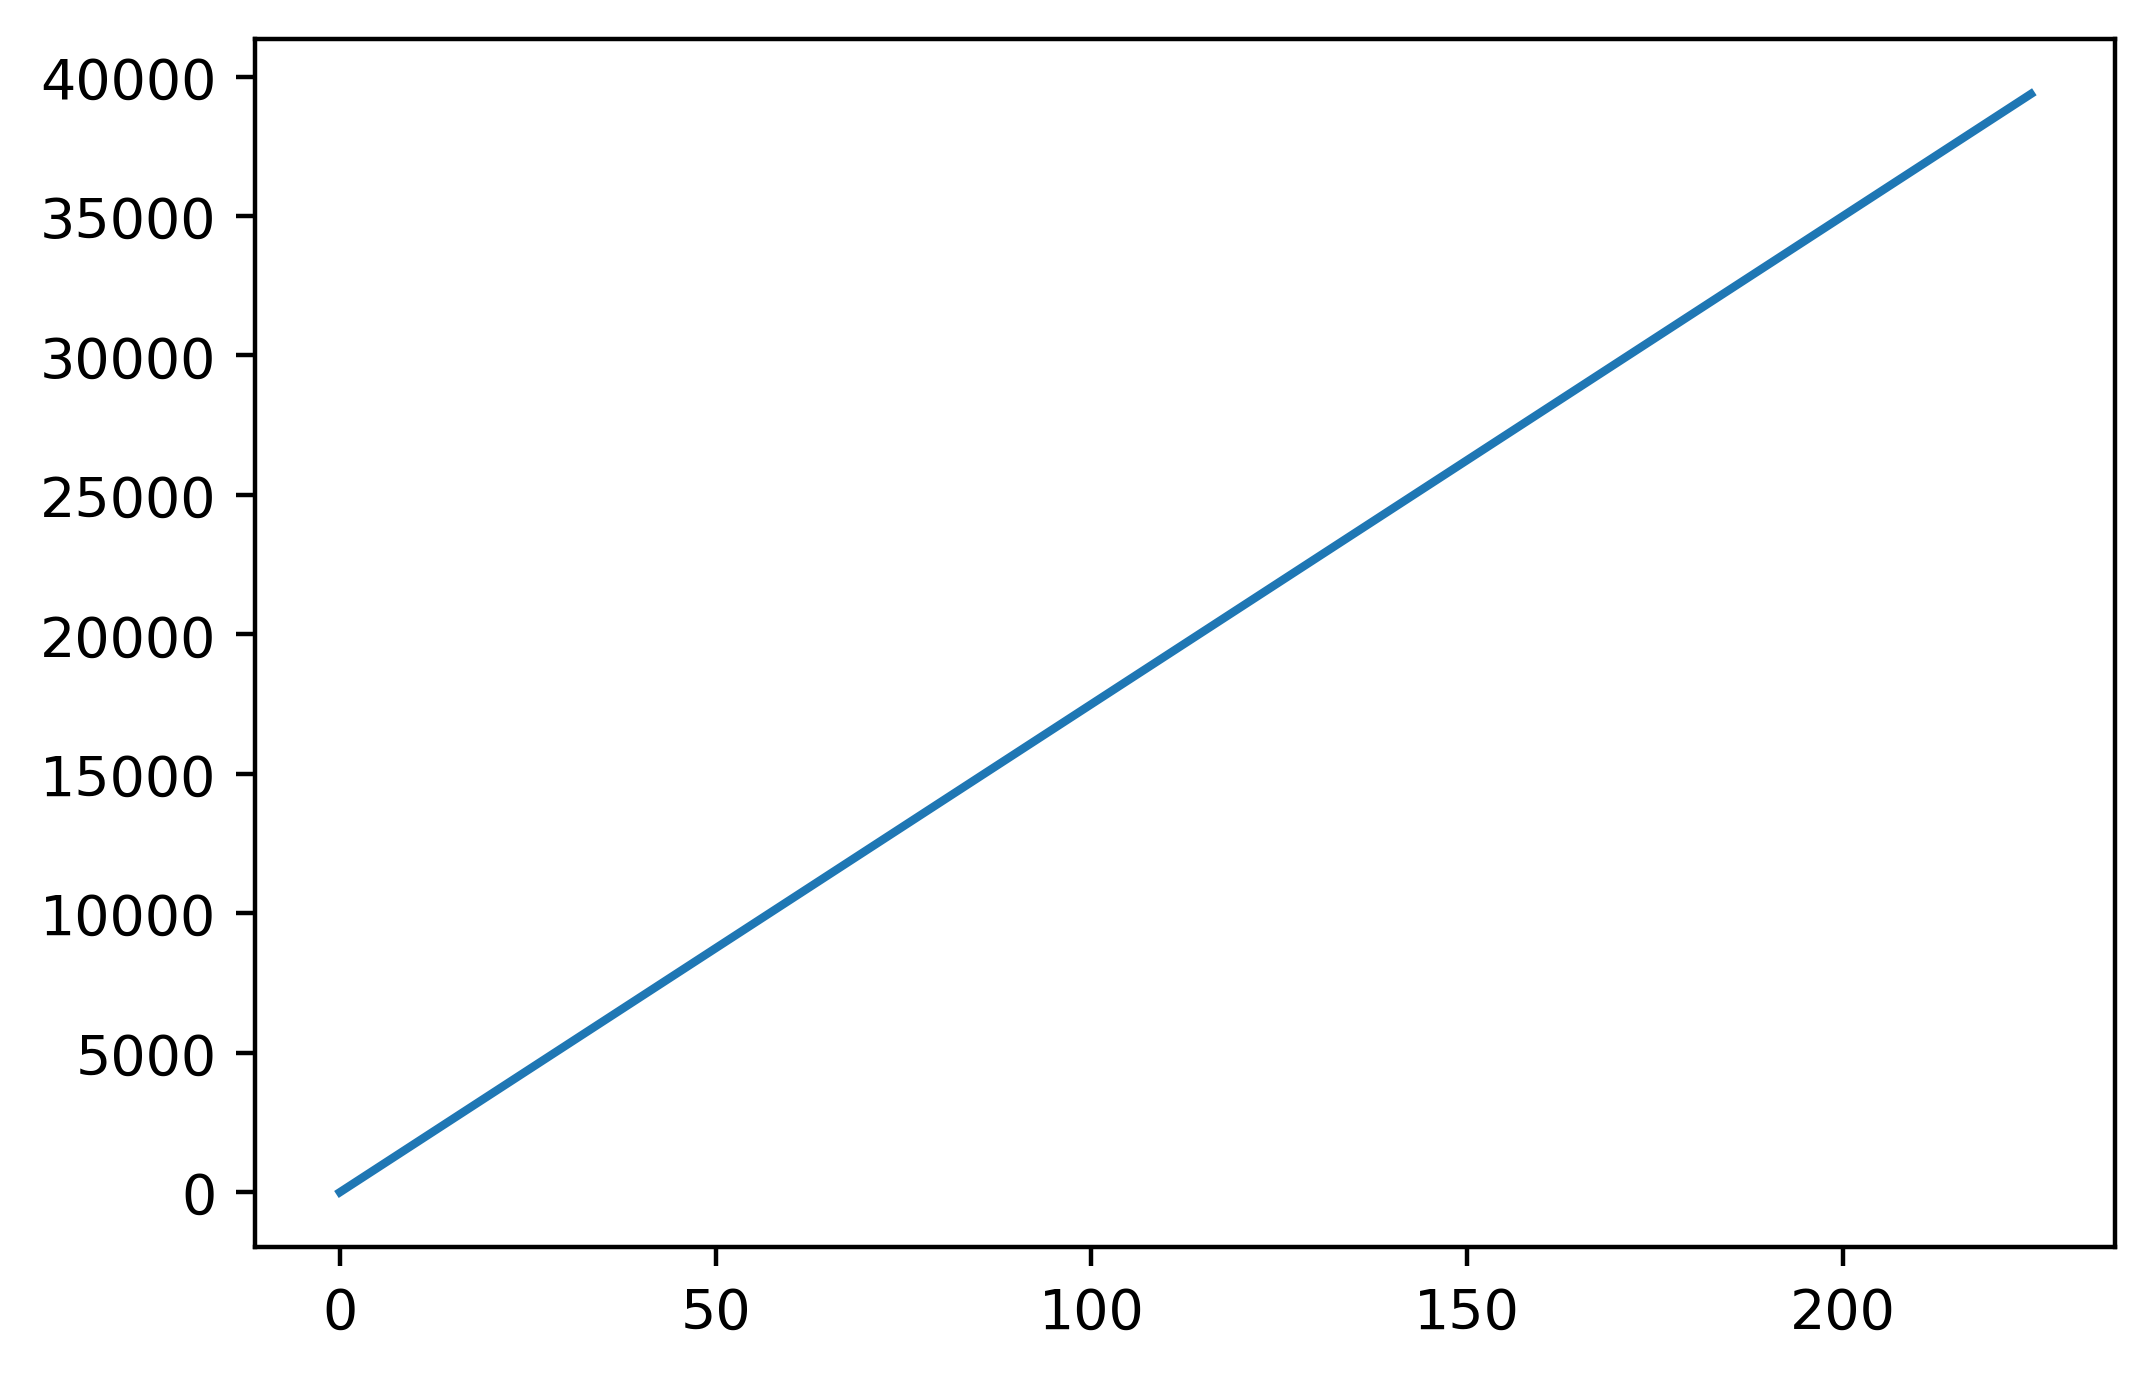

In [ ]:
plt.plot(x,y)
plt.xlabel("Arriving Flight Delay (min)")
plt.ylabel('Total Pax Flight Delay (min)')
plt.title('Flight Delay')

In [17]:
def delay(x):
    flights = [30, 60, 150, 50]
    pax = [25, 50, 60, 40]
    dl = [160, 175, 240, 600]
    ans = 0
    for i in range(4):
        if x > flights[i]:
            ans += pax[i]*dl[i]
    return ans

In [18]:
dl = np.vectorize(delay)
dl(x)

array([    0,     0,     0,  4000, 28000, 36750, 36750, 36750, 36750,
       36750, 36750, 51150, 51150, 51150, 51150, 51150])

Text(0, 0.5, 'Total Pax Flight Delay (min)')

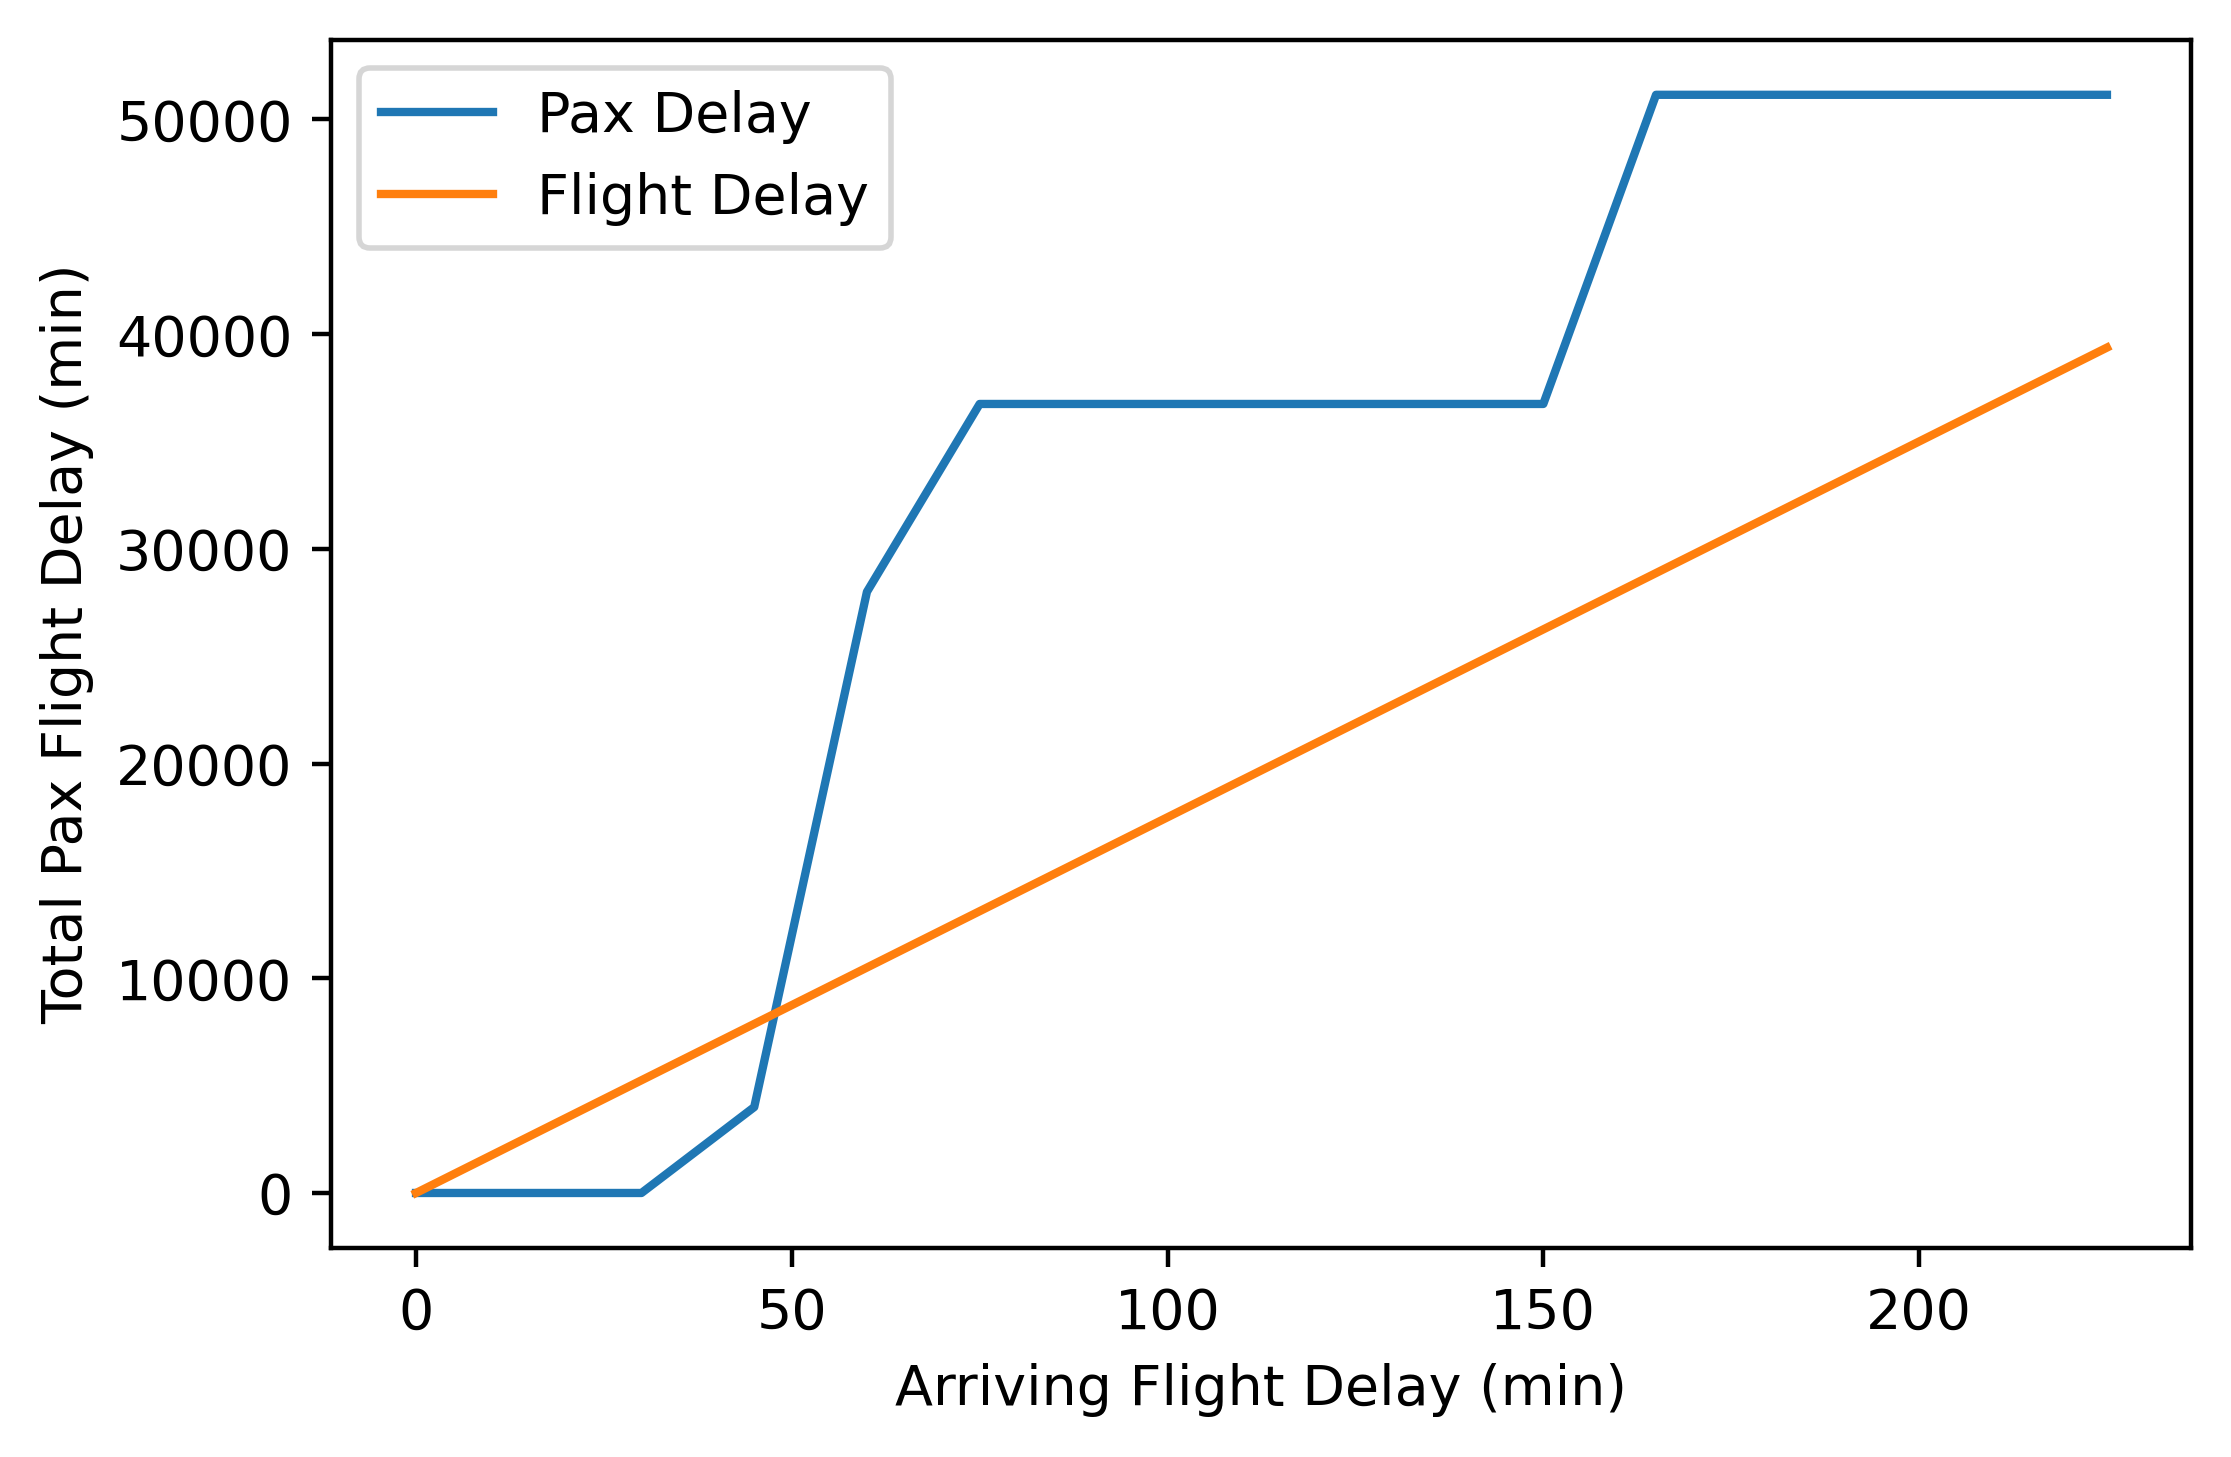

In [21]:
plt.plot(x, dl(x))
plt.plot(x, y)
plt.legend(['Pax Delay','Flight Delay'])
plt.xlabel("Arriving Flight Delay (min)")
plt.ylabel('Total Pax Flight Delay (min)')